In [1]:
# Boston Housing Study (Python)
# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

# program revised by Thomas W. Milller (2017/09/29)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LinearRegression.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Ridge.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Lasso.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.ElasticNet.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.metrics.r2_score.html

# Textbook reference materials:
# Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
# and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
# has sections covering linear regression, polynomial regression,
# and regularized linear models. Sample code from the book is 
# available on GitHub at https://github.com/ageron/handson-ml

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

# modeling routines from Scikit Learn packages

# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv("/Users/amitkumar/Downloads/boston.csv")

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())

print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())

# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)



boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

In [2]:
# New labels assigned but they are replaced in a new df

boston_new = boston.copy()
boston_new.rename(columns={'crim': 'Crime',
                           'zn': '%Lots', 
                           'indus': '%Industry/Retail', 
                           'chas': 'On River(Y/N)', 
                           'nox': 'Pollution', 
                           'rooms': '#Room/Home', 
                           'age': "%built before built '40", 
                           'dis': 'Dist to Emp Centre', 
                           'rad': 'Access to Hwy', 
                           'ptratio': 'Pupil/teacher', 
                           'lstat': '%lower socio-eco status', 
                           'mv': 'Med. Value'}, inplace=True)
print(boston_new)



       Crime  %Lots  %Industry/Retail  On River(Y/N)  Pollution  #Room/Home  \
0    0.00632   18.0              2.31              0      0.538       6.575   
1    0.02731    0.0              7.07              0      0.469       6.421   
2    0.02729    0.0              7.07              0      0.469       7.185   
3    0.03237    0.0              2.18              0      0.458       6.998   
4    0.06905    0.0              2.18              0      0.458       7.147   
..       ...    ...               ...            ...        ...         ...   
501  0.06263    0.0             11.93              0      0.573       6.593   
502  0.04527    0.0             11.93              0      0.573       6.120   
503  0.06076    0.0             11.93              0      0.573       6.976   
504  0.10959    0.0             11.93              0      0.573       6.794   
505  0.04741    0.0             11.93              0      0.573       6.030   

     %built before built '40  Dist to Emp Centre  A

In [3]:

print('\nGeneral description of the boston DataFrame:')
print(boston_new.info())

print('\nDescriptive statistics of the boston DataFrame:')
print(boston_new.describe())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
Crime                      506 non-null float64
%Lots                      506 non-null float64
%Industry/Retail           506 non-null float64
On River(Y/N)              506 non-null int64
Pollution                  506 non-null float64
#Room/Home                 506 non-null float64
%built before built '40    506 non-null float64
Dist to Emp Centre         506 non-null float64
Access to Hwy              506 non-null int64
tax                        506 non-null int64
Pupil/teacher              506 non-null float64
%lower socio-eco status    506 non-null float64
Med. Value                 506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None

Descriptive statistics of the boston DataFrame:
            Crime       %Lots  %Industry/Retail  On River(Y/N)   Pollution  \
count  506.000000  506.000000        506.000000

In [4]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)



Data dimensions: (506, 13)


In [5]:
boston_new.corr()

,Crime,%Lots,%Industry/Retail,On River(Y/N),Pollution,#Room/Home,%built before built '40,Dist to Emp Centre,Access to Hwy,tax,Pupil/teacher,%lower socio-eco status,Med. Value
Crime,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.389582
%Lots,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360386
%Industry/Retail,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.484754
On River(Y/N),-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175663
Pollution,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.429300
#Room/Home,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.696304
%built before built '40,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.377999
Dist to Emp Centre,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249315
Access to Hwy,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.384766
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.471979


In [6]:
# histogram of prelim data
print('\nHistogram of the Prelim Model Data of Boston DataFrame:')
import matplotlib.pyplot as plt
boston_prelim=pd.DataFrame(prelim_model_data,columns=['mv','crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat'])
boston_prelim.hist(bins=50, figsize=(20,15))
plt.show()


Histogram of the Prelim Model Data of Boston DataFrame:


<Figure size 2000x1500 with 16 Axes>

In [7]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)

StandardScaler(copy=True, with_mean=True, with_std=True)
[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]

Dimensions for model_data: (506, 13)



Histogram of the Scaled Model Data of Boston DataFrame:


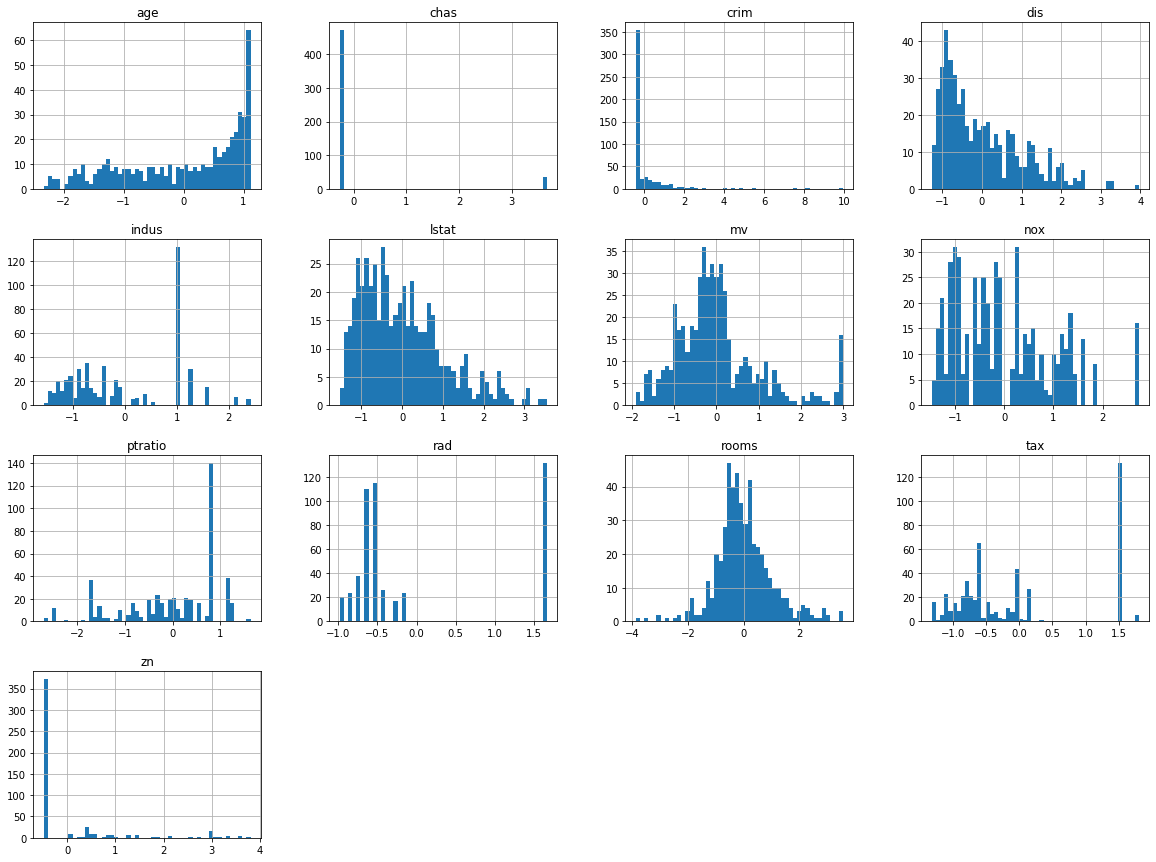

In [8]:
# histogram of scaled model data
print('\nHistogram of the Scaled Model Data of Boston DataFrame:')
boston_scaled=pd.DataFrame(model_data,columns=['mv','crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat'])
boston_scaled.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
corr_matrix=boston_scaled.corr()
corr_matrix['mv'].sort_values(ascending=False)

mv         1.000000
rooms      0.696304
zn         0.360386
dis        0.249315
chas       0.175663
age       -0.377999
rad       -0.384766
crim      -0.389582
nox       -0.429300
tax       -0.471979
indus     -0.484754
ptratio   -0.505655
lstat     -0.740836
Name: mv, dtype: float64

In [10]:
import seaborn as sns
sns.set(style='darkgrid')

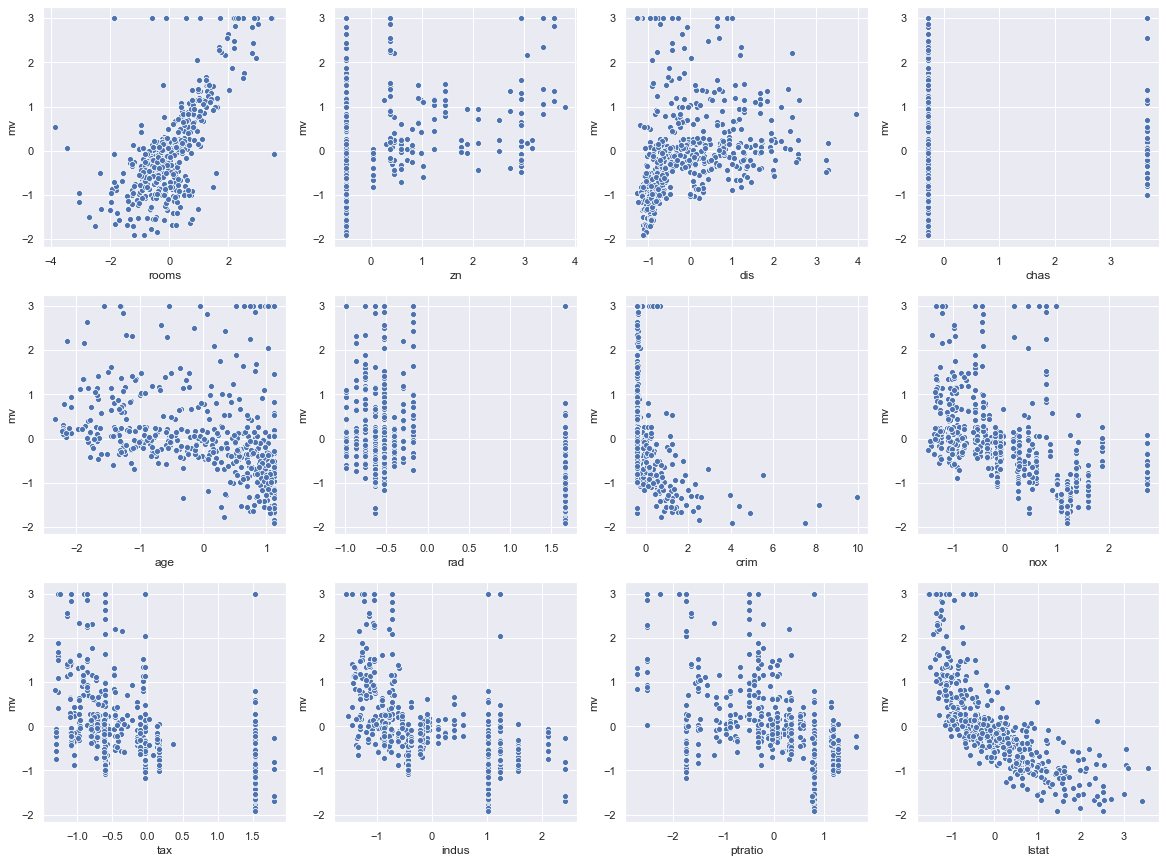

In [11]:
fig,axs=plt.subplots(nrows=3, ncols=4,figsize=(20,15))
g1=sns.relplot(x='rooms',y='mv',data=boston_scaled,ax=axs[0,0])
g2=sns.relplot(x='zn',y='mv',data=boston_scaled,ax=axs[0,1])
g3=sns.relplot(x='dis',y='mv',data=boston_scaled,ax=axs[0,2])
g4=sns.relplot(x='chas',y='mv',data=boston_scaled,ax=axs[0,3])
g5=sns.relplot(x='age',y='mv',data=boston_scaled,ax=axs[1,0])
g6=sns.relplot(x='rad',y='mv',data=boston_scaled,ax=axs[1,1])
g7=sns.relplot(x='crim',y='mv',data=boston_scaled,ax=axs[1,2])
g8=sns.relplot(x='nox',y='mv',data=boston_scaled,ax=axs[1,3])
g9=sns.relplot(x='tax',y='mv',data=boston_scaled,ax=axs[2,0])
g10=sns.relplot(x='indus',y='mv',data=boston_scaled,ax=axs[2,1])
g11=sns.relplot(x='ptratio',y='mv',data=boston_scaled,ax=axs[2,2])
g12=sns.relplot(x='lstat',y='mv',data=boston_scaled,ax=axs[2,3])
plt.close(g1.fig)
plt.close(g2.fig)
plt.close(g3.fig)
plt.close(g4.fig)
plt.close(g5.fig)
plt.close(g6.fig)
plt.close(g7.fig)
plt.close(g8.fig)
plt.close(g9.fig)
plt.close(g10.fig)
plt.close(g11.fig)
plt.close(g12.fig)
plt.show()


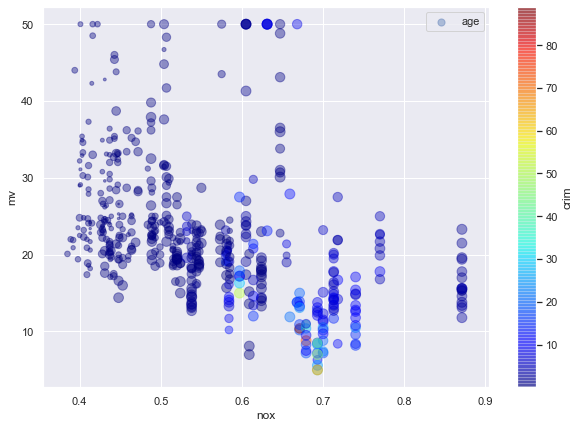

In [12]:
boston_prelim.plot(kind="scatter", x="nox", y="mv", alpha=0.4,
    s=boston_prelim["age"], label="age", figsize=(10,7),
    c="crim", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [13]:
boston_scaled.isnull().sum()

mv         0
crim       0
zn         0
indus      0
chas       0
nox        0
rooms      0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
dtype: int64

In [14]:
#It appears we have strong coorelations with age and lstat, yet the data needs to be transformed. We will first try log10, then squaring, then cubing
boston['logAge'] = np.log10(boston['age'])
boston['logLstat'] = np.log10(boston['lstat'])
boston['logDis']= np.log10(boston['dis'])
boston['logMv'] = np.log10(boston['mv'])

In [15]:
boston['sqAge'] = np.square(boston['age'])
boston['sqLstat'] = np.square(boston['lstat'])
boston['sqDis'] = np.square(boston['dis'])

In [16]:
boston.corr()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,logAge,logLstat,logDis,logMv,sqAge,sqLstat,sqDis
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.389582,0.289668,0.395543,-0.464239,-0.530001,0.382940,0.460510,-0.293661
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360386,-0.517372,-0.477706,0.590655,0.363396,-0.544613,-0.323323,0.685935
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.484754,0.536768,0.597429,-0.761286,-0.543195,0.681602,0.532496,-0.615039
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175663,0.091245,-0.074074,-0.087037,0.158569,0.077838,-0.047605,-0.104814
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.429300,0.640442,0.577072,-0.831977,-0.513431,0.754618,0.530723,-0.661179
rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.696304,-0.207919,-0.664528,0.256584,0.632536,-0.255863,-0.545322,0.158071
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.377999,0.946946,0.606806,-0.778243,-0.455029,0.982112,0.523764,-0.664043
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249315,-0.677360,-0.480612,0.964671,0.342527,-0.748234,-0.448110,0.967552
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.384766,0.391323,0.460506,-0.560335,-0.486818,0.476367,0.451766,-0.405848
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.471979,0.423624,0.522385,-0.619008,-0.566214,0.540039,0.494704,-0.425147


In [17]:
#It appears the log of age is the best transformation. We will utilize it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2a1520f10>,
      dtype=object)

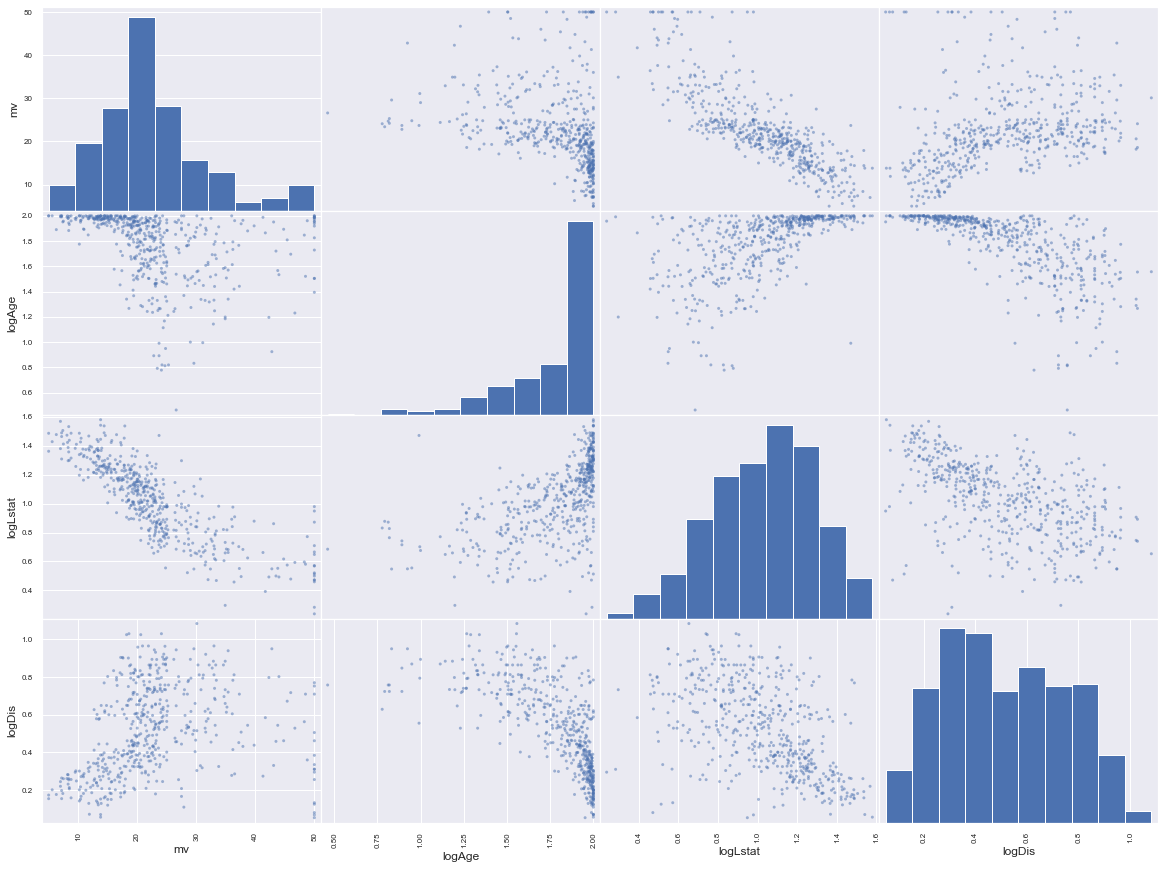

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(boston[['mv', 'logAge','logLstat','logDis']], figsize=(20,15))

In [19]:
#TODO
#convert log age and check coorelation
#convert log lstat and check coorelation
#convert log dis and check coorelation
#convert sqrt variables



In [20]:
boston['mv'].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: mv, dtype: float64

In [21]:
# Calculated the Lower & Upper bound of Outliers for 'mv'

Q1 = boston['mv'].quantile(0.25)
Q3 = boston['mv'].quantile(0.75)
IQR = Q3 - Q1
L_Out = Q1 - 1.5 * IQR
U_Out = Q3 + 1.5 * IQR
print('L_Outlier=', L_Out)
print('U_Outlier=', U_Out)

L_Outlier= 5.0624999999999964
U_Outlier= 36.962500000000006


In [22]:
# Index number along with corresponding'mv' values, which are outliers

boston['mv'][(boston['mv'] >= U_Out) | (boston['mv'] <= L_Out)]

97     38.7
98     43.8
157    41.3
161    50.0
162    50.0
163    50.0
166    50.0
179    37.2
180    39.8
182    37.9
186    50.0
195    50.0
202    42.3
203    48.5
204    50.0
224    44.8
225    50.0
226    37.6
228    46.7
232    41.7
233    48.3
253    42.8
256    44.0
257    50.0
261    43.1
262    48.8
267    50.0
268    43.5
280    45.4
282    46.0
283    50.0
291    37.3
368    50.0
369    50.0
370    50.0
371    50.0
372    50.0
398     5.0
405     5.0
Name: mv, dtype: float64

In [23]:
# replace the 'mv' values below or above the outliers with NaN and test by checking for Index 405 for NaN, seen above

boston.loc[(boston['mv'] >= U_Out) | (boston['mv'] <= L_Out),'mv'] = np.nan
boston['mv'].tail(101)

405     NaN
406    11.9
407    27.9
408    17.2
409    27.5
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    19.0
Name: mv, Length: 101, dtype: float64

In [24]:
# replace the NaN with the median value.
boston['mv'].fillna(boston['mv'].quantile(0.50), inplace = True)
boston['mv'].tail(105)

401     7.2
402    12.1
403     8.3
404     8.5
405    20.6
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    19.0
Name: mv, Length: 105, dtype: float64

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(boston, test_size=0.2, random_state = 42)
si = SimpleImputer(strategy='median')
si.fit_transform(train_set)

array([[1.50234000e+01, 0.00000000e+00, 1.81000000e+01, ...,
        9.46729000e+03, 6.20508100e+02, 4.41294049e+00],
       [6.27390000e-01, 0.00000000e+00, 8.14000000e+00, ...,
        3.19225000e+03, 7.17409000e+01, 2.02374020e+01],
       [3.46600000e-02, 3.50000000e+01, 6.06000000e+00, ...,
        5.42890000e+02, 6.13089000e+01, 4.40988965e+01],
       ...,
       [1.50100000e-02, 8.00000000e+01, 2.01000000e+00, ...,
        8.82090000e+02, 3.58801000e+01, 6.96223360e+01],
       [1.11604000e+01, 0.00000000e+00, 1.81000000e+01, ...,
        8.94916000e+03, 5.41492900e+02, 4.51435009e+00],
       [2.28760000e-01, 0.00000000e+00, 8.56000000e+00, ...,
        7.29316000e+03, 1.12996900e+02, 7.36959609e+00]])